# Understand Brazilian E-commerce co.



In [131]:
# Import all of the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
import datetime as dt

In [132]:
ls

EDA.ipynb                              olist_order_payments_dataset.csv*
README.md                              olist_order_reviews_dataset.csv*
Untitled.ipynb                         olist_orders_dataset.csv*
brazilian-ecommerce/                   olist_products_dataset.csv*
olist_customers_dataset.csv*           olist_sellers_dataset.csv*
olist_geolocation_dataset.csv*         product_category_name_translation.csv*
olist_order_items_dataset.csv*


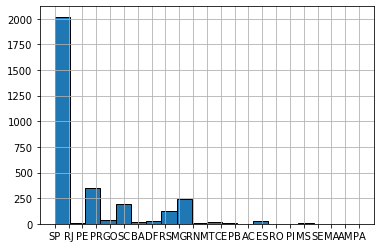

In [207]:
customer = pd.read_csv("olist_customers_dataset.csv")              
location = pd.read_csv("olist_geolocation_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
payment = pd.read_csv("olist_order_payments_dataset.csv")
review = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
seller = pd.read_csv("olist_sellers_dataset.csv")
product_name = pd.read_csv("product_category_name_translation.csv")

                    




In [101]:
estat_cat = df['order_status'].unique().tolist()
stat_cat

['delivered',
 'invoiced',
 'shipped',
 'processing',
 'unavailable',
 'canceled',
 'created',
 'approved']

In [102]:
status_cat = pd.Categorical(df['order_status'], categories=stat_cat, ordered=False)
status_cat
                           

[delivered, delivered, delivered, delivered, delivered, ..., delivered, delivered, delivered, delivered, delivered]
Length: 99441
Categories (8, object): [delivered, invoiced, shipped, processing, unavailable, canceled, created, approved]

In [103]:
#reassign status_cat to original "order_Status col
df['order_status'] = status_cat

In [104]:
#do the same to product_name_category

cat_name = product['product_category_name'].unique().tolist()
product['product_category_name'] = pd.Categorical(product['product_category_name'], categories=cat_name, ordered=False)
product['product_category_name'].describe()

count                     71
unique                    71
top       seguros_e_servicos
freq                       1
Name: product_category_name, dtype: object

In [254]:
product.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [106]:
#capitalize first character of each word
customer['customer_city'] = customer['customer_city'].str.title()
customer['customer_state'] = customer['customer_state'].str.upper()
customer['customer_state'].value_counts().head(7)

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
Name: customer_state, dtype: int64

In [107]:
review['review_comment_title'] = review['review_comment_title'].str.strip().str.lower()

In [108]:
product['product_category_name_english'][1]

'computers_accessories'

In [109]:
#replace underline w/ spaces
product['product_category_name_english'] = product['product_category_name_english'].str.replace('_',' ').str.lower()
product['product_category_name_english'].value_counts().head(13)

watches gifts                        1
health beauty                        1
cool stuff                           1
fashion male clothing                1
small appliances                     1
home comfort 2                       1
bed bath table                       1
stationery                           1
auto                                 1
books technical                      1
party supplies                       1
agro industry and commerce           1
furniture mattress and upholstery    1
Name: product_category_name_english, dtype: int64

In [110]:
to_eng_cat_name = product['product_category_name_english'].unique().tolist()
to_eng_cat_name[0]

'health beauty'

In [127]:
#This took me too long to understand.
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])#make the columns into datetime.
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])

orders["duration_in_days"] = (orders["order_estimated_delivery_date"] - orders["order_delivered_customer_date"])/np.timedelta64(1, 'D')
#subtract estimated delivery by actual date received



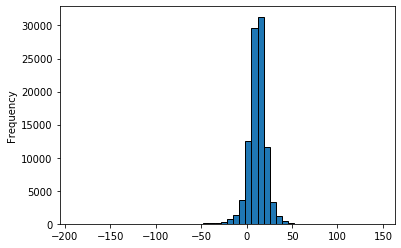

In [125]:
orders['duration_in_days'].plot(kind='hist', bins=50)

In [126]:
orders['on_time'] = ((orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date'])/(np.timedelta64(1, 'D')))

In [191]:
order_items['total_value'] = order_items['price'].add(order_items['freight_value']) #create new column with price & freight included




In [192]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


In [193]:
order_items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,140.644059
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,190.724394
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,6.080000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,55.220000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000,92.320000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,157.937500


AttributeError: 'DataFrame' object has no attribute 'value_counts'

# 2. Visualizations

### Data is better understood when it is visualized




In [194]:
order_items['order_item_id'].value_counts().sort_index()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

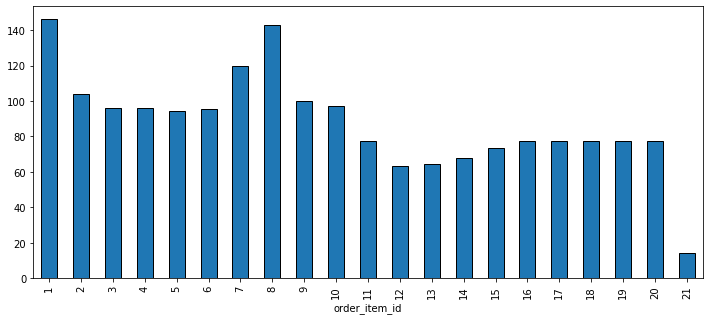

In [195]:
order_items.groupby('order_item_id')['total_value'].mean().plot(kind='bar',figsize=(12,5))




count     3095
unique      23
top         SP
freq      1849
Name: seller_state, dtype: object

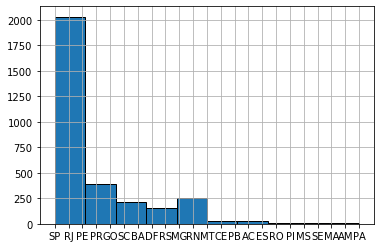

In [213]:
seller['seller_state'].hist(bins=10)
#most of the orders come from Sao Paolo, nearly 60% of orders come from SP


seller['seller_state'].describe()

In [214]:
payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


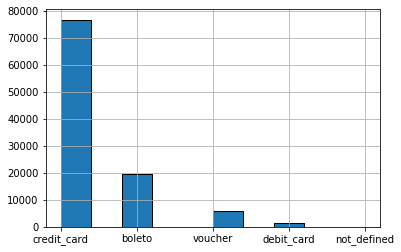

In [264]:
payment['payment_type'].hist(bins=10)

In [250]:
#payment.payment_type.unique()

payment['payment_type'].value_counts() #frequency of e/ item in a column

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

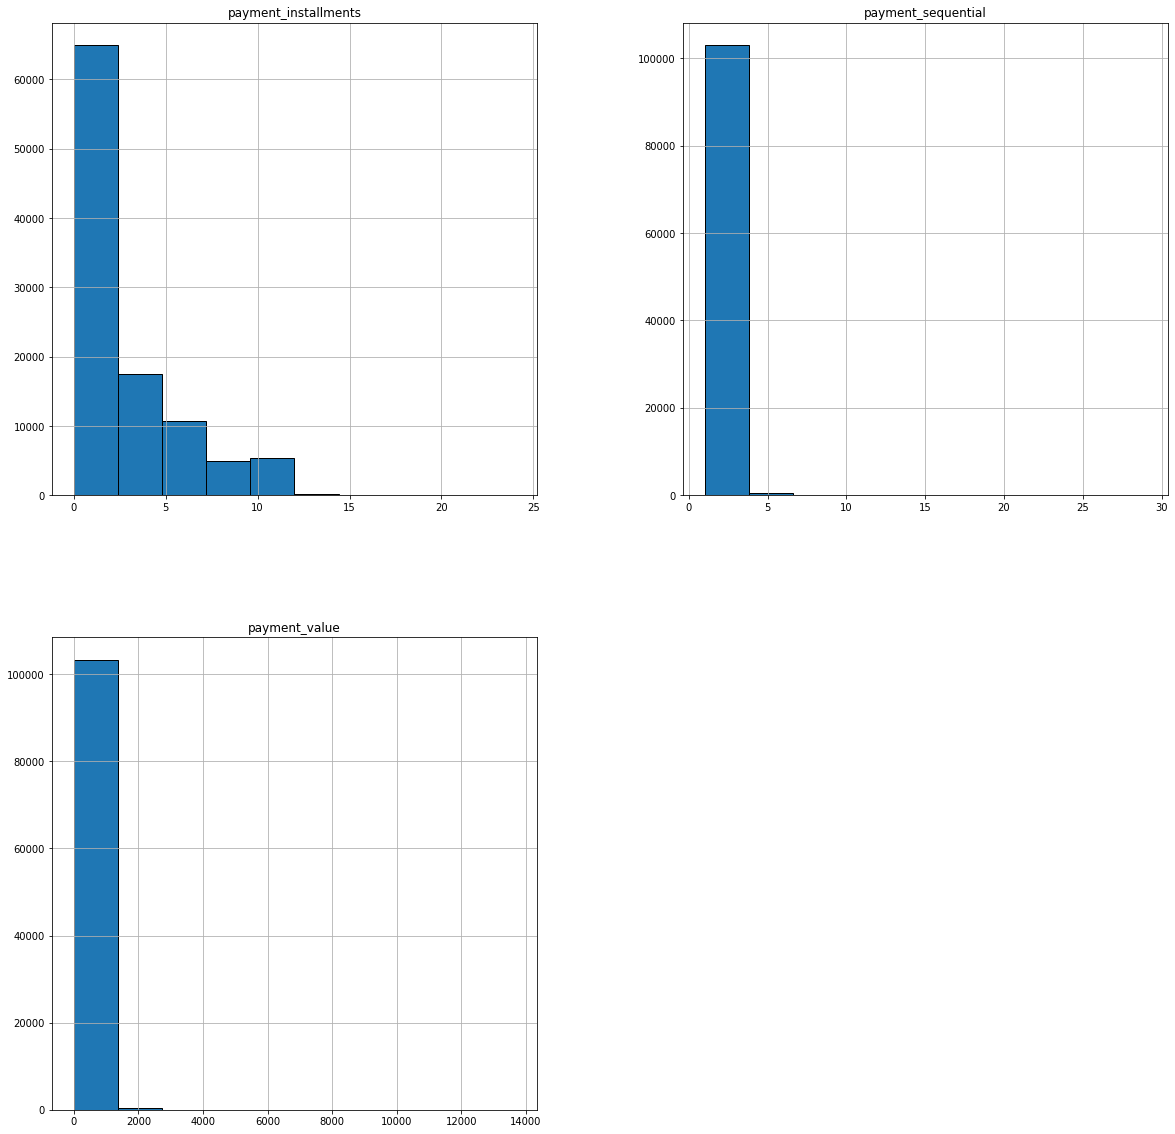

In [260]:
payment.hist(figsize=(20,20))
plt.show()